## Chapter 13

asdfasdf ## A view about propositions

## A learning task

The displayed line through the origin classifies the points in the plane, with the light blue above and the light red below.

In particular, it classifies the displayed purple dots.

Task: *using only* the displayed purple dots and how they are classified by the displayed line, *compute* a second line through the origin which is approximately correct in the following ways:

1. classifies the purple dots the same (or approximately the same) as the displayed line, 

2. has high probability of succeeding on other dots

In this case, high probability means that the area between the two lines should be small.

In [11]:
import math 
import numpy as np
import pandas as pd
from scipy.stats import binom, norm
from scipy.integrate import quad
import matplotlib
import matplotlib.pyplot as plt   
import metakernel
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets    
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, IntSlider
import seaborn as sns
sns.set_palette('pastel')
pastel_palette = sns.color_palette('pastel')
import random

In [12]:
def sign(x):
    return 1 if x > 0 else -1



In [13]:
# generate linearlly separate target data

m1 = random.choice([-.25, .25])*np.random.rand(1)
m2 = random.choice([-.25,.25])*np.random.rand(1)
b = 0

# number of data points

n = 250

# generate training data 

def f(x1, x2):
    return m1*x1 + m2*x2+ b

data_x1 = np.random.uniform(-.5, .5, n)
data_x2 = np.random.uniform(-.5, .5, n)
data_0 = list(zip(data_x1, data_x2))
data_1 = [(x1, x2, sign(f(x1, x2))) for x1, x2 in data_0]


In [14]:
# define update function 

def update(w, data):
    misclassifed = [x for x in data if x[2] != sign(w[0]*x[0]+w[1]*x[1])]
    if len(misclassifed) == 0:
        return w, np.array([0, 0])
    else:
        x1, x2, y = random.choice(misclassifed)
        return w+y*np.array([x1, x2]), np.array([x1, x2])



# Define the number of iterations
l = 500

# Create a list to store all stages of w
w_stages = [[.25,-.25]]
w_points = [[0,0]]

# Run the update function over and over again
for _ in range(l):
    w, p = update(w_stages[-1], data_1)
    w_stages.append(list(w))  # Append the current stage of w to w_stages
    w_points.append(list(p))  # Append the current stage of w to w_stages 




## The perceptron algorithm

### Formatting the data

Since we know the purple points and the way that they are classified by the displayed line, we can view the data as organized as $(x_1, y_1, \pm 1), \ldots, (x_n, y_n, \pm 1)$, where $+1$ indicates that it was above the displayed line, and $-1$ indicates that it was below the displayed line.

### Formatting lines

Lines through the origin can be represented as pairs $(w_0, w_1)$ that determine the line 

$$\{(x,y): w_0\cdot x + w_1\cdot y=0\}$$

By setting $m=-\frac{w_0}{w_1}\cdot x$ one can put this in the more familiar format $y=mx$.

### The update procedure

We view ourselves as constructing lines represented by $(w_0(t), w_1(t))$ as a variable of the time $t=0, 1, 2, \ldots$. 

At $t=0$, we choose an arbitrary line (we choose $w_0(t)=\frac{1}{4}$ and $w_1(t)=-\frac{1}{4}$). 

At stage $t$, if we have correctly classified all the data, then we do nothing. 

But at stage $t+1$, if we have incorrectly classified a point as $\mp 1$ where we should have put $\pm 1$, we choose such a point $(x(t), y(t))$, and we shift to 

$$w_0(t+1) = w_0(t)\pm x(t)$$

$$w_1(t+1) = w_1(t)\pm y(t)$$

In the digrams below, the new line with represented by $(w_0(t+1), w_1(t+1))$ is drawn with a green line, and the point  $(x(t), y(t))$ incorrectly classified at stage $(w_0(t), w_1(t))$ is drawn with a big red dot.


In [15]:
def visual_perceptron(j, last_points = False):

    x = np.linspace(-.5, .5, 100)
    y = np.linspace(-.5, .5, 100)
    target = (1/m2)*(-m1*x - b)
    output = (1/w_stages[j][1])*(-w_stages[j][0]*x)

    # Create a plot
    plt.xlim(-.5, .5)
    plt.ylim(-.5,.5)
    plt.fill_between(x, target, 1, alpha=0.25, color = pastel_palette[0])
    plt.fill_between(x, target, -1, alpha=0.25, color = pastel_palette[1])

    xdata_0, ydata_0 = zip(*data_0)

    plt.plot(x, output, color = pastel_palette[2])

    plt.scatter(xdata_0, ydata_0, color = pastel_palette[4], s=10)

    if last_points:
        if w_points[j+1][0] != 0 and w_points[j+1][1] != 0:
            plt.scatter(w_points[j+1][0], w_points[j+1][1], color = pastel_palette[3], s=100)
    
    plt.title("Perceptron algorithm %i initial data points, %i steps of algorithm" % (n, j))

    plt.show()


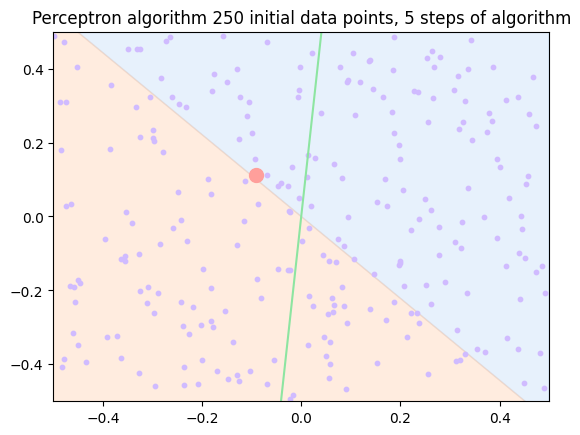

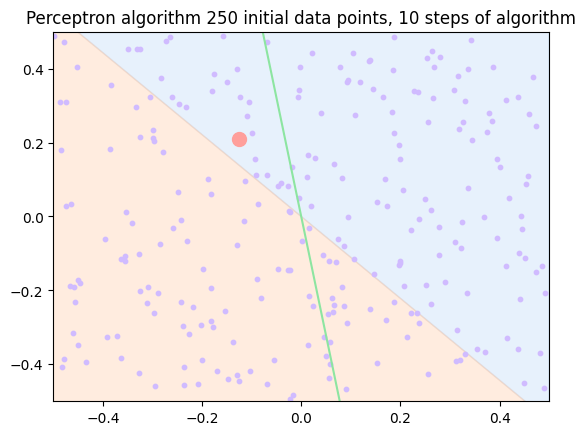

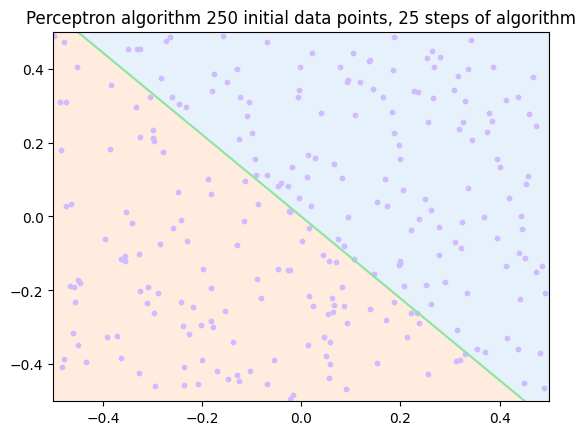

In [16]:
visual_perceptron(5, last_points=True)   
visual_perceptron(10, last_points=True)   
visual_perceptron(25, last_points=True)   


In [17]:
interact(visual_perceptron,
         j=IntSlider(min=0, max=l-1, step=1, value=3), 
         last_points=True)

interactive(children=(IntSlider(value=3, description='j', max=499), Checkbox(value=True, description='last_poi…

<function __main__.visual_perceptron(j, last_points=False)>

### Two facets of appoximate correctness revisited

One can use a geometric argument to show that at some point the algorithm teminates and that when it does so the computed line classifies all of the purple dots the same as the original line. 

However, nothing about this geometric argument guarantees that the second computed  lined is going to agree exactly with the original line. 

Nonetheless, observation suggests that the area between the two lines is small, and gets smaller the more one increases the number of original purple dots. Since the area is going proxy for probability of points in this case, this means that the observed phenomena is that the probability that the computed line and the original line agree is really high, as one increases the number of original purple dots

What explains this second aspect of correctness? 

It turns out that the relevant feature is: the hypotheses we are considering (namley lines) are comparatively simple in a certain sense.

## VC dimension

## An illustration

Suppose that one has $n$ points on the Euclidean plane.

There are $2^n$ many subsets of these points.

But how many of them can one generate via lines?

For instance, consider $n=5$ and a pentagon of five points, as displayed below, and consider the corner points marked with blue and red circles. There is no way to have a line such that the only points above the line are these: for, once you have a line with both of them above it, the top point of the pentagon will also be above it.

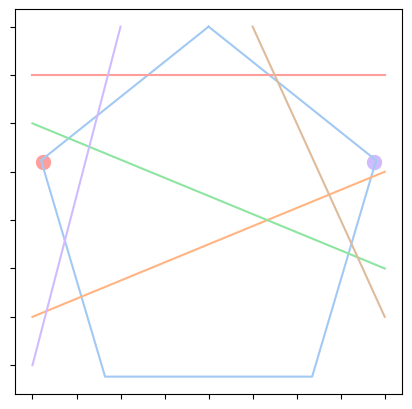

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of sides
n = 5

# Define the radius
r = 1

# Define the angles, starting from -pi/2 to make the pentagon symmetric around the y-axis
angles = np.linspace(-np.pi/2, 3*np.pi/2, n+1, endpoint=True)

# Define the x and y coordinates
x = r * np.cos(angles)
y = r * np.sin(angles)

# Create a plot
plt.figure(figsize=(5,5))
plt.plot(x, y)

plt.plot([-1, 1], [.5, -0.25])
plt.plot([-1, 1], [-.5, 0.25])
plt.plot([-1, 1], [-.75, -0.75])
plt.plot([-1, -.5], [.75, -1])
plt.plot([.25,1], [-1, .5])

plt.scatter(-.94,-.30, color = pastel_palette[3], s=100, label = "ω_1")
plt.scatter(.94,-.30, color = pastel_palette[4], s=100, label = "ω_2")


plt.gca().invert_yaxis()

# Hide the x-axis and y-axis labels
plt.gca().set(xticklabels=[], yticklabels=[])


# Show the plot
plt.show()

### Shattering

Suppose $\Omega$ is a set of worlds and $\mathcal{P}\subseteq \{A\subseteq \Omega\}$ is a set of propositions.

For a subset $\Omega_0\subseteq \Omega$, we define the induced set of propositions $\mathcal{P}\upharpoonright \Omega_0 = \{A\cap \Omega_0: A\in \mathcal{P}\}$. Note that $\mathcal{P}\upharpoonright \Omega_0\subseteq  \{A\subseteq \Omega\}$.

A subset $\Omega_0$ of worlds of size $k$ is *$\mathcal{P}$-shattered* if there are $2^k$-many propositions in $\mathcal{P}\upharpoonright \Omega_0$.

For $n\geq k$ we define $B_{\mathcal{P}}(n,k)$ as the maximum size of the $\mathcal{Q}\subseteq \mathcal{P}\upharpoonright \Omega_0$ such that $\Omega_0$ has $n$-elements and no $k$-element subset is $\mathcal{Q}$-shattered.

We abbreviate $B_{\mathcal{P}}(n,k)$ as $B(n,k)$ when $\mathcal{P}$ is clear from context.

### Proposition 

For $n\geq k>1$, one has $B(n,k)\leq B(n-1,k)+B(n-1, k-1)$

*Proof*:

Suppose that $B(n,k)$ is given by the size of $\mathcal{Q}\subseteq \mathcal{P}\upharpoonright \Omega_0$ such that $\Omega_0$ has $n$-elements and no $k$-element subset is $\mathcal{Q}$-shattered.

Let $\Omega_1$ be an $(n-1)$-element subset of it. Note that 

($\star$) no $k$-element subset of $\Omega_1$ is $\mathcal{Q}$-shattered, since this would be a $k$-element subset of $\Omega_0$ which was $\mathcal{Q}$-shattered.

Some propositions $\mathcal{Q}_1$ in $\mathcal{Q}\upharpoonright \Omega_1$ will extend to only one proposition in $\mathcal{Q}$, and others $\mathcal{Q}_2$ will extend to two propositions in $\mathcal{Q}$.

Say that there are $\ell$ of the first and $m$ of the second. 

Hence the number of propositions in $\mathcal{Q}$ is $\ell+2m= \ell+m+m$.

And the number of propositions in $\mathcal{Q}\upharpoonright \Omega_1$ is $\ell+m$. 

Thus $\ell+m\leq B(n-1,k)$ by ($\star$).

Let $\Omega_2$ be a $(k-1)$-element subset of $\Omega_1$. Then $\Omega_2$ is not $\mathcal{Q}_2$-shattered:  for, if so then these $2^{k-1}$ many propositions can be extended to $2\cdot 2^{k-1}=2^k$ many propositions in $\mathcal{Q}$.

Then $m\leq B(n-1,k-1)$


### Proposition

For $n\geq k\geq 1$, one has $B(n,k)\leq c\cdot n^{k-1}$, where $c=B(2,2)$.

*Proof*

For $k=1$, we have $B(n,k)=1$.

For $k=2$ we argue by induction on $k\geq 2$. The case of $k=2$ is by definition of $c$.

For the induction step, suppose it holds for $n\geq k$; we show it holds for $n+1$. By the previous proposition and induction hypothesis we have

$B(n+1,k)\leq B(n,k)+B(n,k-1)\leq c\cdot n^{k-1}+c\cdot n^{k-2}\leq c\cdot (n+1)^{k-1}$

where the latter follows by the binomial theorem. 

Now we argue by induction on $k\geq 1$ that for all $n\geq k$ we have $B(n,k)\leq c\cdot n^{k-1}$. We just did the two base cases. Suppose it holds for $k\geq 2$; we show it holds for $k+1$. For the base case of $n=k+1$, one has $B(k+1,k+1)\leq 2^{k+1}\leq (k+1)^k = n^{k}$, where the second inequality follows from $k\geq 2$. The induction step follows as up above using the previous proposition.


### Breaks points and polynomial bound

*Definition*. A number $k\geq 1$ is *$\mathcal{P}$-break point* if there is no $k$-element subset which is $\mathcal{P}$-shattered.

*Definition*. The number $m_{\mathcal{P}}(n)$ is the maximum size $\mathcal{P}\upharpoonright \Omega_0$ as $\Omega_0$ ranges over $n$-element sets of worlds.

*Corollary*. If $k\geq 1$ is a $\mathcal{P}$-break point, then for all $n\geq k$ one has $m_{\mathcal{P}}(n)\leq c\cdot n^{k-1}$ for some constant $c>0$.

*Proof*: Suppose that $k\geq 1$ is a $\mathcal{P}$-break point. Suppose $n\geq k$. Suppose that $m_{\mathcal{P}}(n)$ is the size of $\mathcal{Q}=\mathcal{P}\upharpoonright \Omega_0$. Since $k$ is a break point, no $k$-element subset is $\mathcal{Q}$-shattered. Then $m_{\mathcal{P}}(n)\leq B(n,k)\leq c\cdot n^{k-1}$.
